# Import Library

In [51]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, make_scorer, fbeta_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import  PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
import warnings
warnings.filterwarnings('ignore')

# Introduction
In this project, I built two models that can be used to classify types of wines. Two methods used is done

1. Without PCA 
2. With PCA

A few classifiers are tried with both approach. The classifers include 
- Decision Trees
- Logistic Regression 
- Gaussian Naive Bayes
- Random Forest Classifier
- SGD Classifier

The dataset used in this project is gotten from datasets stored in sklearn 


# Load Dataset

In [53]:
wine = datasets.load_wine()

In [54]:
X = pd.DataFrame(wine.data ,columns=wine.feature_names)
y =  pd.DataFrame(wine.target, columns=['wine_class'])

## Wine Details (Dataset)

In [55]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### Data Preprocessing

In [56]:
scaler = StandardScaler()

In [57]:
df = pd.concat([X,y], axis=1)

In [58]:
X = scaler.fit_transform(X)

In [59]:
df.describe(include='all' )

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Visualization of the dataset 

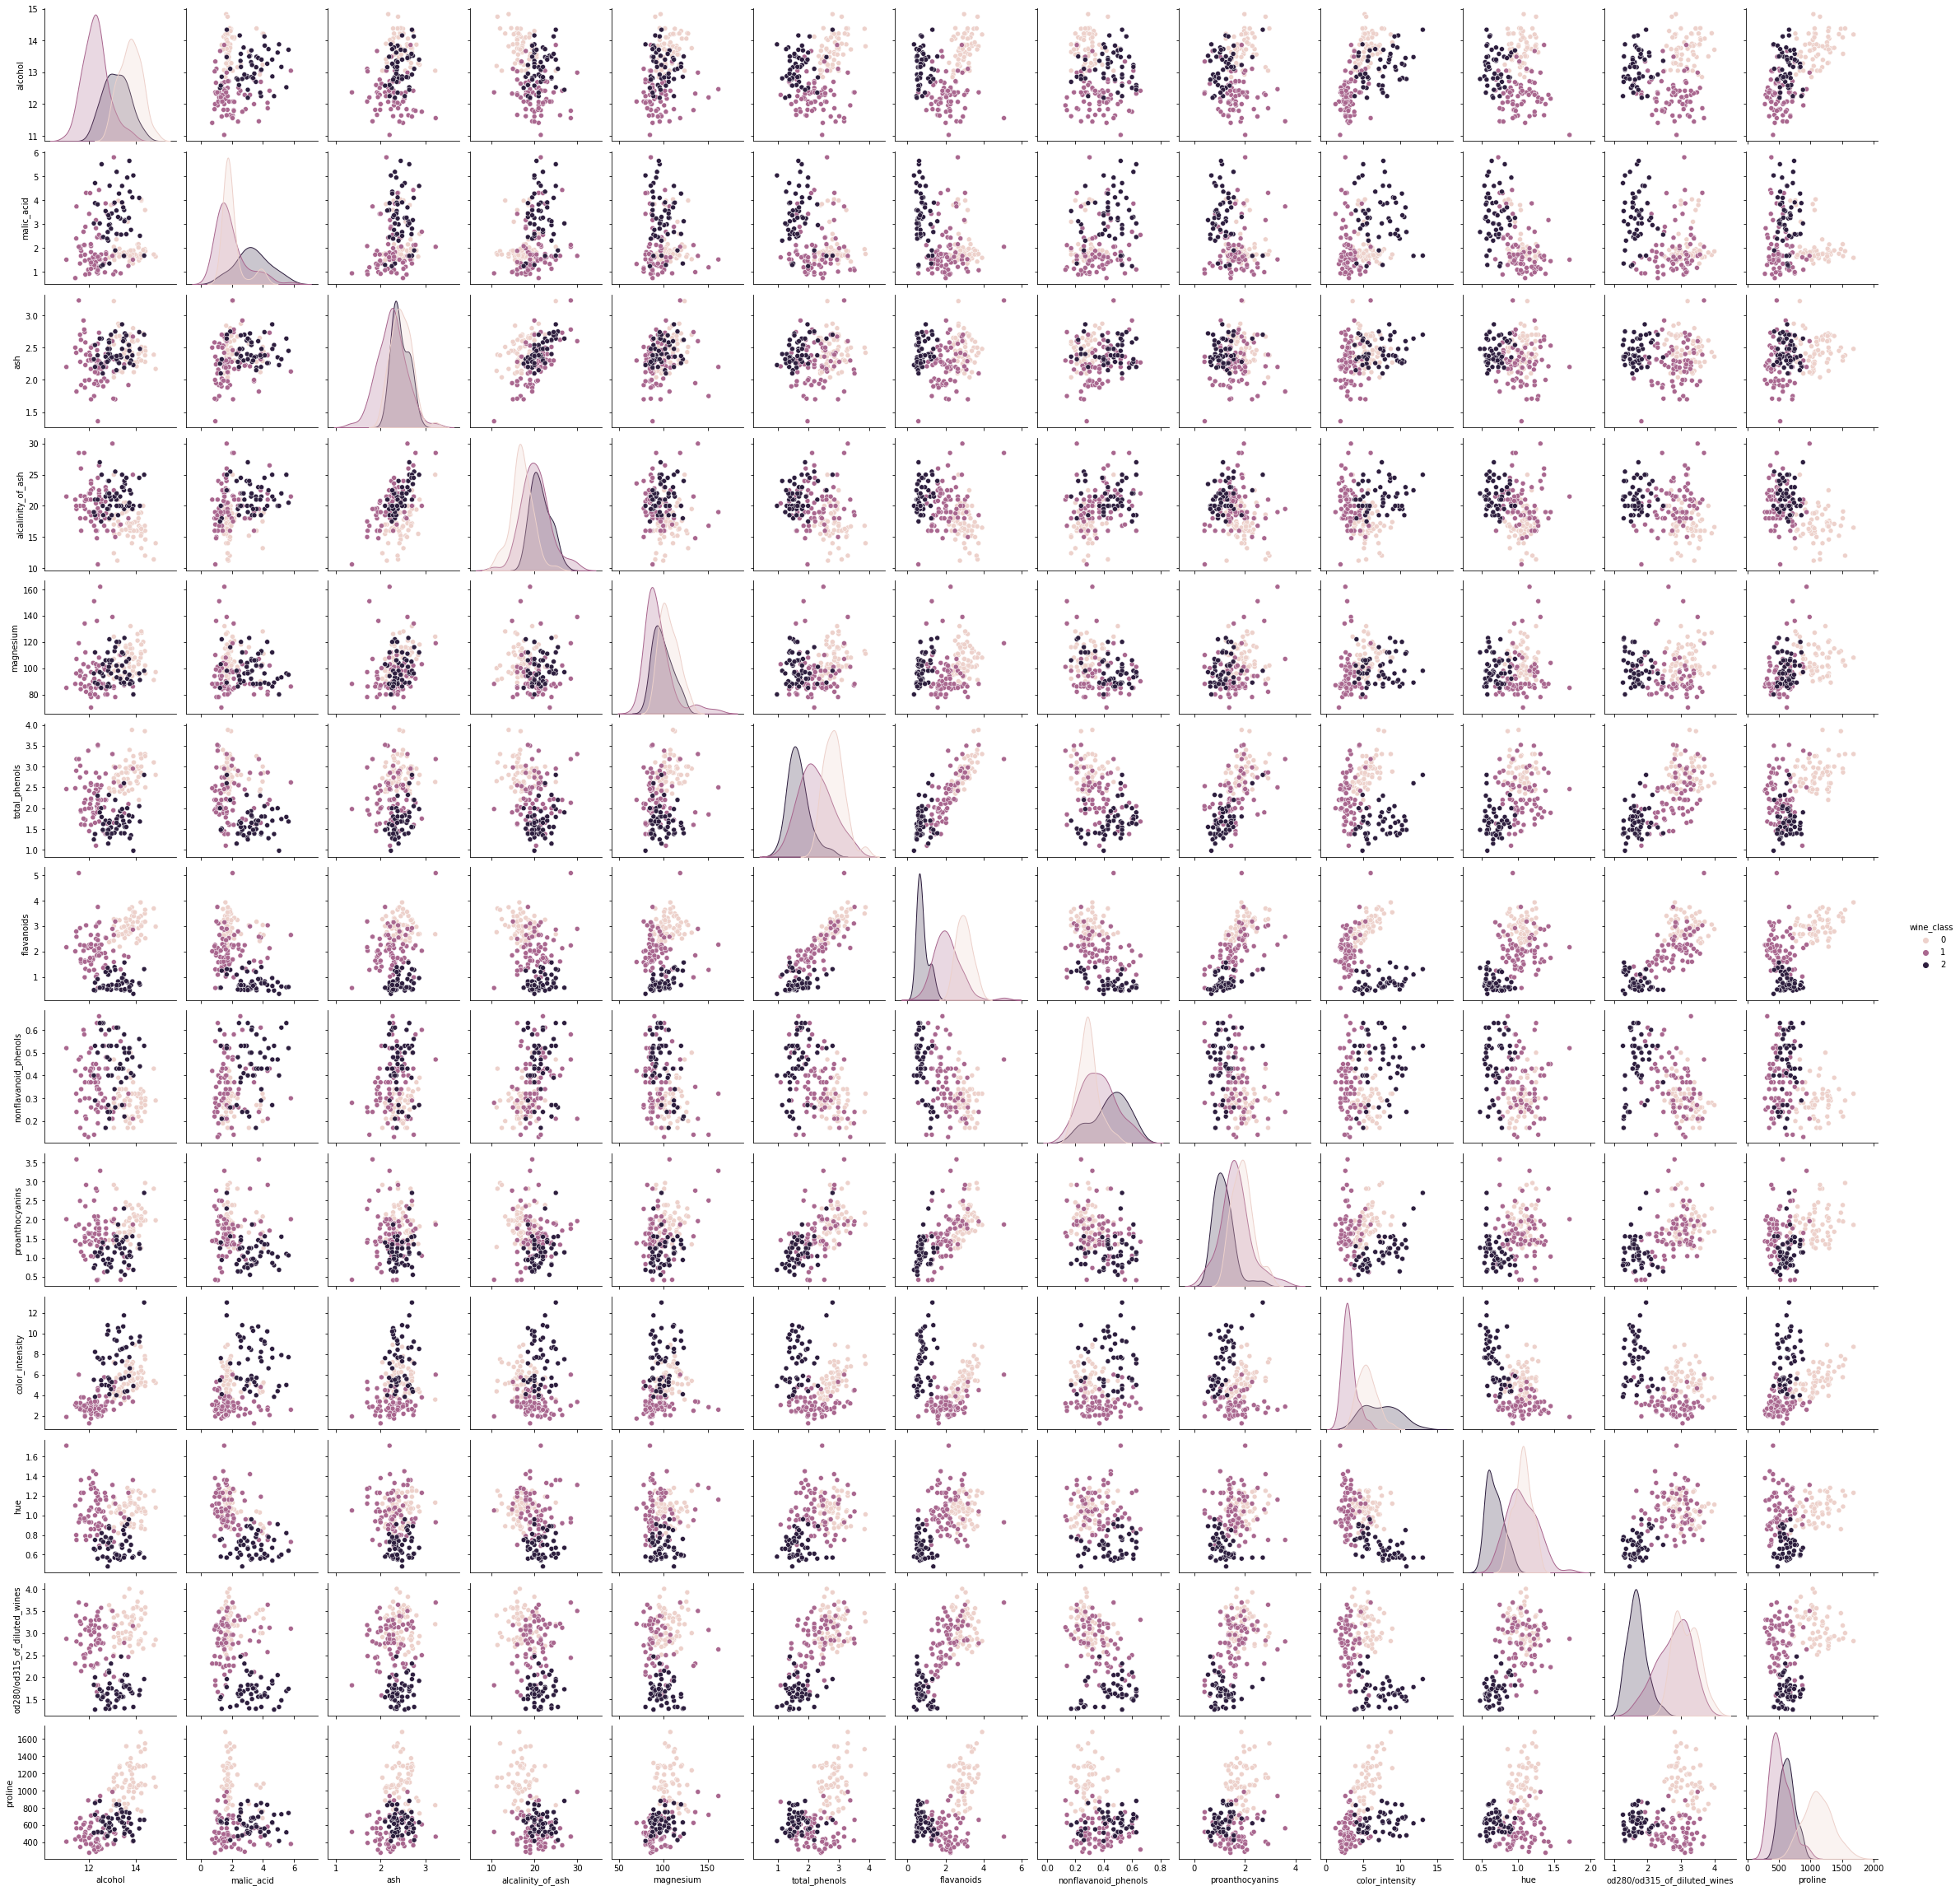

In [12]:
sns.pairplot(df, hue='wine_class')

#### Train Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Classifier & Params to be Checked

In [61]:
f1_score = make_scorer(fbeta_score, beta=1, average='micro')


def Grid_Search(model, paramaters, X, y):
    model = GridSearchCV(estimator=model, 
                 param_grid=paramaters, 
                 cv=3,
                scoring=f1_score
                )
    
    return model.fit(X, y)

In [62]:

svc_clf = SVC()
dtree = DecisionTreeClassifier()
GNB = GaussianNB()
SGD = SGDClassifier() 
LR = LogisticRegression()
KNb = KNeighborsClassifier()

svcparams = {'degree':[1,2,3, 10], 'C':[1,10] }
dtreeparams = {'max_depth':[1,2,3] }
SGDparams = {'l1_ratio':[0.1,0.15,0.2,0.5] }
LRparams = {'l1_ratio':[0.1,0.15,0.2,0.5, 0.6,0.7, 0.8, 1] }
KNbparams = {'n_neighbors':[1,2,3,4,5] }

algorithm = []
scores = []

list_of_algorithms = [(svc_clf,svcparams, 'SVC'), ( dtree, dtreeparams, 'dtree') ,
                      (SGD,SGDparams, 'SGD'), (LR, LRparams, 'LR'), (KNb, KNbparams, 'K Nearest Neighbors') ]


# Model Selection Without PCA

In [63]:

for (model, parameters, name_of_algorithms) in list_of_algorithms:
    models = Grid_Search(model, parameters, X_train, y_train.values.flatten())
    scores.append(pd.DataFrame(models.cv_results_)['mean_test_score'].max())
    algorithm.append(name_of_algorithms)
    
   
    

In [64]:
Performance_test_dataset = pd.DataFrame(scores,algorithm, columns=['F1 Score Performance'])

In [65]:
Performance_test_dataset['F1 Score Performance'].sort_values(ascending=False)

SGD                    0.977441
LR                     0.977441
SVC                    0.969865
dtree                  0.924579
K Nearest Neighbors    0.917508
Name: F1 Score Performance, dtype: float64

SGDClassifier shows the best performance with  F1 Score

In [66]:
selected_model = Grid_Search(SGD, SGDparams, X_train, y_train.values.flatten())

#### Confusion Matrix on Training Set 

In [67]:
cm = confusion_matrix(y_train,selected_model.predict(X_train))

[Text(0, 0.5, 'Actual 0s'),
 Text(0, 1.5, 'Actual 1s'),
 Text(0, 2.5, 'Actual 2s')]

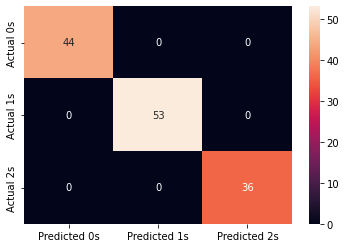

In [68]:
g = sns.heatmap(cm, annot=True)
g.get_xaxis().set_label_coords(-0.2,0.5)
g.get_yaxis().set_label_coords(-0.2,0.5)
g.set_xticklabels(['Predicted 0s', 'Predicted 1s', 'Predicted 2s'], ha='center')
g.set_yticklabels(['Actual 0s', 'Actual 1s', 'Actual 2s'], va='center')


In [69]:
cm2 = confusion_matrix(y_test,selected_model.predict(X_test))

#### Confusion Matrix on Test Set 

[Text(0, 0.5, 'Actual 0s'),
 Text(0, 1.5, 'Actual 1s'),
 Text(0, 2.5, 'Actual 2s')]

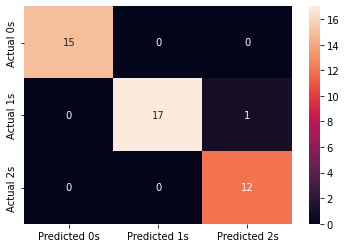

In [70]:
g = sns.heatmap(cm2, annot=True)
g.get_xaxis().set_label_coords(-0.2,0.5)
g.get_yaxis().set_label_coords(-0.2,0.5)
g.set_xticklabels(['Predicted 0s', 'Predicted 1s', 'Predicted 2s'], ha='center')
g.set_yticklabels(['Actual 0s', 'Actual 1s', 'Actual 2s'], va='center')

When the SGD model built is applied on the dataset it leads to only one false guess 

# Model Selection Using PCA

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

#### PCA Application on training set
This is used to combine the variable components into 2 components

In [72]:
PCA = PCA(n_components=2)
pca_x = PCA.fit_transform(X_train) # PCA on training set

<AxesSubplot:>

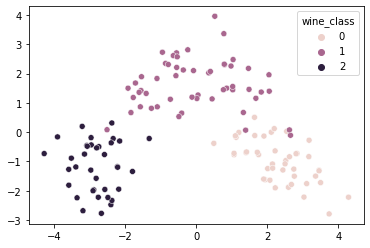

In [73]:
sns.scatterplot(pca_x[:,0], pca_x[:,1], hue=y_train['wine_class']) #scatterplot of the training set indentified with class

The scatterplot shows a two dimensional view of the variables after the PCA has been applied. The colour differention is based on the different classes. 

it can be seen that the different classes are clustered in around one another, which gives a very good indication that the wine types can be easily classified. 

##### Applying Different models on the pca set

In [78]:

algorithm = []
scores = []

for (model, parameters, name_of_algorithms) in list_of_algorithms:
    models = Grid_Search(model, parameters, pca_x, y_train.values.flatten())
    scores.append(pd.DataFrame(models.cv_results_)['mean_test_score'].max())
    algorithm.append(name_of_algorithms)

In [79]:
Performance_test_dataset = pd.DataFrame(scores,algorithm, columns=['F1 Score Performance'])

In [80]:
Performance_test_dataset['F1 Score Performance'].sort_values(ascending=False)

SVC                    0.969865
SGD                    0.969865
LR                     0.962290
K Nearest Neighbors    0.962290
dtree                  0.932660
Name: F1 Score Performance, dtype: float64

Its a tie with SGD and SVC in terms of f1 score performance, however SVC would be selected here.

In [81]:
pca_X_test = PCA.transform(X_test)

In [82]:
selected_model = Grid_Search(svc_clf, svcparams, pca_x, y_train.values.flatten())

In [83]:
cm = confusion_matrix(y_train,selected_model.predict(pca_x))

#### confusion matrix on training set

[Text(0, 0.5, 'Actual 0s'),
 Text(0, 1.5, 'Actual 1s'),
 Text(0, 2.5, 'Actual 2s')]

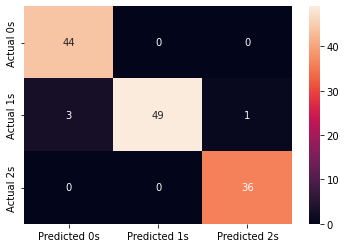

In [84]:
g = sns.heatmap(cm, annot=True)
g.get_xaxis().set_label_coords(-0.2,0.5)
g.get_yaxis().set_label_coords(-0.2,0.5)
g.set_xticklabels(['Predicted 0s', 'Predicted 1s', 'Predicted 2s'], ha='center')
g.set_yticklabels(['Actual 0s', 'Actual 1s', 'Actual 2s'], va='center')


#### confusion matrix on test set

In [85]:
cm_test = confusion_matrix(y_test,selected_model.predict(pca_X_test))

[Text(0, 0.5, 'Actual 0s'),
 Text(0, 1.5, 'Actual 1s'),
 Text(0, 2.5, 'Actual 2s')]

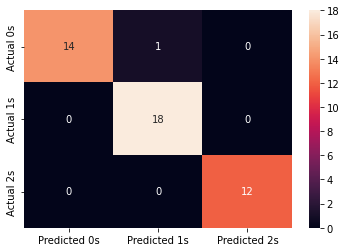

In [86]:
g = sns.heatmap(cm_test, annot=True)
g.get_xaxis().set_label_coords(-0.2,0.5)
g.get_yaxis().set_label_coords(-0.2,0.5)
g.set_xticklabels(['Predicted 0s', 'Predicted 1s', 'Predicted 2s'], ha='center')
g.set_yticklabels(['Actual 0s', 'Actual 1s', 'Actual 2s'], va='center')

When the SVC model built is applied on the test set, there is only one wrong guess